In [54]:
from keras import datasets


In [55]:
from keras.datasets import imdb

In [56]:
(train_data , train_labels), (test_data, test_labels) = imdb.load_data(num_words= 10000)


In [57]:
train_data[0] # all the words of each senetece are given a saperate number 


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [58]:
train_labels[0] # 1 means +ve review and 0 means -ve review


1

In [59]:

# we can see the full sentecne of a review with the hepl of this code 
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key ) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 4 , "?") for i in train_data[0]])

In [60]:
decoded_review

"? i but that or viewer apart shocking impression only 5 embarrassment story merit ? same an woman the not too or dance many some mostly ? to by history true the watching ? few many makes ? you're mean so ? few reads state was highly who it called ? can't some that and i'm murdered for i but ? judge questionable seemed ? but can first in that or viewer who we this it dad ? but was favorite was in that whose as ? the my came in of during of characters the ? send primitive that history story sloppy all ? your in that who exactly the not show there an these has not bother all and but in gets his much what the i human that do ? of ? watch acting profession this woman ? ? a carpenter the entertainment an can or viewer \x96 you doing everyone it's a ? ? spoilers it after great ? start this watched make one genuinely very you go and take northam as ? there's but movie here \x96 you history the through he penny as there an his family most not after ? there's only that who club great in that re

In [61]:
# encoding the integer equence into a binary matrix
# as we know that for tensorflow and keras , we have to convert integers to tensors

import numpy as np

def vectorize_sequence(sequence, dimension = 10000):
  result = np.zeros((len(sequence), dimension))
  for i , sequence in enumerate(sequence):
    result[i , sequence] = 1

  return result

In [62]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [63]:
x_train[0] # now the train and test data is converted to tensors


array([0., 1., 1., ..., 0., 0., 0.])

In [64]:
# and also we have ti vectorize our labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [65]:
#building the neaural network 
from keras import models
from keras import layers


In [66]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [67]:
#model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics= ["accuracy"])

In [68]:
# validation our approach 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [69]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [70]:
# training the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics= ["acc"])

In [71]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5426 - acc: 0.7529 - val_loss: 0.4090 - val_acc: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3262 - acc: 0.9003 - val_loss: 0.3191 - val_acc: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2333 - acc: 0.9292 - val_loss: 0.2880 - val_acc: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1846 - acc: 0.9423 - val_loss: 0.2880 - val_acc: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1527 - acc: 0.9516 - val_loss: 0.2868 - val_acc: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1254 - acc: 0.9643 - val_loss: 0.3148 - val_acc: 0.8775
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1037 - acc: 0.9709 - val_loss: 0.3248 - val_acc: 0.8767
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0889 - a

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

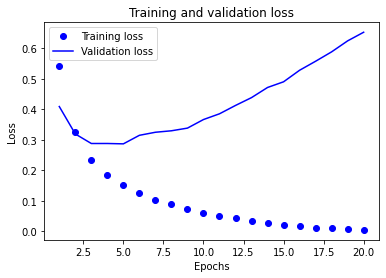

In [74]:
# plotting 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

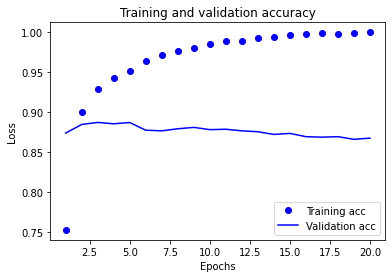

In [75]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
# predicting 
model.predict(x_test)

array([[0.01038691],
       [0.999998  ],
       [0.9372666 ],
       ...,
       [0.00185922],
       [0.00657257],
       [0.92491865]], dtype=float32)